<a href="https://colab.research.google.com/github/juanes2855/FerreteriaUQ/blob/master/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PEC 1 20232**


Extensión de NumPy para manejar y  análizar datos, apoyandose en el concepto de dataframe

Integrantes:

             Julian Andres Masso Lopez
             John Fredy Muñoz Diaz
             Jhon Edison Vargas
             Juan Esteban Henao Ramírez

Descargue el siguiente dataset:
https://archive.ics.uci.edu/ml/datasets/adult

**1. Complete el diccionario de datos (en tipo poner entero, real, binominal polinominal)**




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# se importa numpy
import numpy  as np
# libreria para graficar
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__
# si hay una versión antigua se actualiza
#!python -m pip install pandas==1.3.5

'1.5.3'

In [2]:
#Lectura de archivo
df = pd.read_csv('/content/sample_data/kdd/adult.data')

#Cambio de nombre de encabezados
df.columns = [
'age',
'workclass'         ,
'fnlwgt' ,
'education'            ,
'education-num',
'marital-status'            ,
'occupation' ,
'relationship' ,
'race'         ,
'sex' ,
'capital-gain'           ,
'capital-loss'  ,
'hours-per-week'   ,
'native-country'    ,
'income'    ]

#print(df.isin([' ?']).sum(axis=0))
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['native-country'] = df['native-country'].replace(' ?', np.nan)


#Cambio de tipos de datos
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['income'] = df['income'].astype('category')

#print (df.dtypes)
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [3]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Identifique si hay columnas con más del 30% de valores faltantes.**

In [4]:
for col in df.columns:
  if df[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df[col].isna().sum() / len(df[col]))*100 , 3)}%")

La columna workclass tiene 1836 valores vacíos.
Porcentaje faltante 5.639%
La columna occupation tiene 1843 valores vacíos.
Porcentaje faltante 5.66%
La columna native-country tiene 583 valores vacíos.
Porcentaje faltante 1.791%


Por lo tanto no hay columnas con mas del 30% de datos faltantes

In [5]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**Cambio de datos Nan**

In [6]:
df.iloc[805]

age                                   50
workclass                            NaN
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                           NaN
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

In [26]:
df2 = df.copy()
df2['occupation'].fillna(df2['occupation'].mode()[0], inplace=True)
df2['workclass'].fillna(df2['workclass'].mode()[0], inplace=True)
df2['native-country'].fillna(df2['native-country'].mode()[0], inplace=True)
for col in df2.columns:
  if df2[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df2[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df2[col].isna().sum() / len(df2[col]))*100 , 3)}%")

In [27]:
df2.iloc[805]

age                                   50
workclass                        Private
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                Prof-specialty
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

**Adecuación de datos**

In [28]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df2['workclass'].unique()

[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked']
Categories (8, object): [' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
                         ' Self-emp-not-inc', ' State-gov', ' Without-pay']

In [30]:
df2['workclass'] = df2['workclass'].map({' Self-emp-not-inc': 0,
                                            ' Self-emp-inc': 1,
                                            ' Local-gov': 2,
                                            ' State-gov': 3,
                                            ' Federal-gov': 4,
                                            ' Private': 5,
                                            ' Without-pay': 6,
                                            ' Never-worked': 7})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [31]:
df2['education'] = df2['education'].map({' Preschool': 0,
                                            ' 1st-4th': 1,
                                            ' 5th-6th': 2,
                                            ' 7th-8th': 3,
                                            ' 9th': 4,
                                            ' 10th': 5,
                                            ' 11th': 6,
                                            ' 12th': 7,
                                            ' HS-grad': 8,
                                            ' Some-college': 9,
                                            ' Assoc-acdm': 10,
                                            ' Assoc-voc': 11,
                                            ' Bachelors': 12,
                                            ' Masters': 13,
                                            ' Doctorate': 14,
                                            ' Prof-school': 15})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [32]:
df2['marital-status'] = df2['marital-status'].map({' Never-married': 0,
                                                      ' Married-civ-spouse': 1,
                                                      ' Married-AF-spouse': 2,
                                                      ' Married-spouse-absent': 3,
                                                      ' Divorced': 4,
                                                      ' Separated': 5,
                                                      ' Widowed': 6})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [33]:
df2['occupation'] = df2['occupation'].map({' Exec-managerial': 0,
                                              ' Handlers-cleaners': 1,
                                              ' Prof-specialty': 2,
                                              ' Other-service': 3,
                                              ' Adm-clerical': 4,
                                              ' Sales': 5,
                                              ' Transport-moving': 6,
                                              ' Farming-fishing': 7,
                                              ' Machine-op-inspct': 8,
                                              ' Tech-support': 9,
                                              ' Craft-repair': 10,
                                              ' Protective-serv': 11,
                                              ' Armed-Forces': 12,
                                              ' Priv-house-serv': 13})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
df2['relationship'] = df2['relationship'].map({' Husband': 0,
                                                  ' Not-in-family': 1,
                                                  ' Wife': 2,
                                                  ' Own-child': 3,
                                                  ' Unmarried': 4,
                                                  ' Other-relative': 5})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,1,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,0,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,2,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,2,White,Female,0,0,40,United-States,<=50K


In [35]:
df2['race'] = df2['race'].map({' White': 0, ' Black': 1,
                                  ' Asian-Pac-Islander': 2,
                                  ' Amer-Indian-Eskimo': 3,
                                  ' Other': 4})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,1,0,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,0,1,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,2,1,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,2,0,Female,0,0,40,United-States,<=50K


In [36]:
df2['native-country'] = df2['native-country'].map({ ' United-States': 0,
                                            ' Cambodia': 1,
                                            ' England': 2,
                                            ' Puerto-Rico': 3,
                                            ' Canada': 4,
                                            ' Outlying-US(Guam-USVI-etc)': 5,
                                            ' India': 6,
                                            ' Japan': 7,
                                            ' Greece': 8,
                                            ' South': 9,
                                            ' China': 10,
                                            ' Cuba': 11,
                                            ' Iran': 12,
                                            ' Honduras': 13,
                                            ' Philippines': 14,
                                            ' Italy': 15,
                                            ' Poland': 16,
                                            ' Jamaica': 17,
                                            ' Vietnam': 18,
                                            ' Mexico': 19,
                                            ' Portugal': 20,
                                            ' Ireland': 21,
                                            ' France': 22,
                                            ' Dominican-Republic': 23,
                                            ' Laos': 24,
                                            ' Taiwan': 25,
                                            ' Haiti': 26,
                                            ' Columbia': 27,
                                            ' Hungary': 28,
                                            ' Guatemala': 29,
                                            ' Nicaragua': 30,
                                            ' Scotland': 31,
                                            ' Thailand': 32,
                                            ' Yugoslavia': 33,
                                            ' El-Salvador': 34,
                                            ' Trinadad&Tobago': 35,
                                            ' Peru': 36,
                                            ' Hong': 37,
                                            ' Germany': 38,
                                            ' Ecuador': 39,
                                            ' Holand-Netherlands': 40})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,Male,0,0,13,0,<=50K
1,38,5,215646,8,9,4,1,1,0,Male,0,0,40,0,<=50K
2,53,5,234721,6,7,1,1,0,1,Male,0,0,40,0,<=50K
3,28,5,338409,12,13,1,2,2,1,Female,0,0,40,11,<=50K
4,37,5,284582,13,14,1,0,2,0,Female,0,0,40,0,<=50K


In [37]:
df2['sex'] = df2['sex'].map({' Male': 0, ' Female': 1})

In [38]:
df2['income'] = df2['income'].map({' <=50K': 0, ' >50K': 1})

In [39]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,0,0,0,13,0,0
1,38,5,215646,8,9,4,1,1,0,0,0,0,40,0,0
2,53,5,234721,6,7,1,1,0,1,0,0,0,40,0,0
3,28,5,338409,12,13,1,2,2,1,1,0,0,40,11,0
4,37,5,284582,13,14,1,0,2,0,1,0,0,40,0,0


**4. Construya un gráfico de cajas y bigotes para 2 variables numéricas, en relación con clase.  Concluya al respecto.**

In [40]:
df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


          count       mean        std   min   25%   50%   75%   max
income                                                             
0       24719.0  36.783648  14.020365  17.0  25.0  34.0  46.0  90.0
1        7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


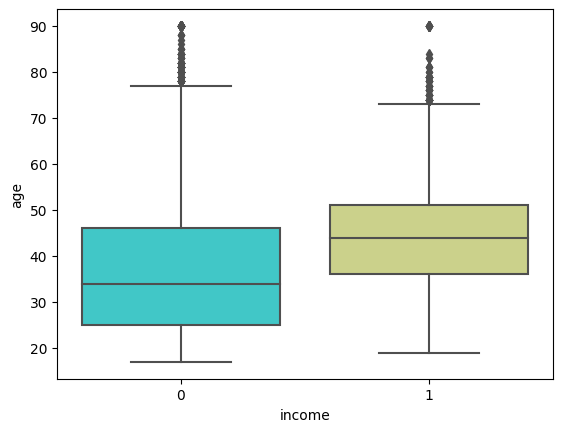

In [41]:
sns.boxplot(x="income", y="age", data=df2,palette='rainbow');
# Crear un DataFrame con los datos de 'age' agrupados por 'income'
summary_df = df2.groupby('income')['age'].describe()

# Mostrar el resumen
print(summary_df)


Income 0: <=50k , 1: >50k

la mayoría de los ingresos <=50K se encuentran en el rango de edad entre 25 y 46, y se puede ver que los valores atipicos por encima del bigote aproximadamente de 78 años para arriba.
Por otro lado encontramos que los ingresos >50K se encuentran en el rango de edad entre 36 y 51, tambien podemos observar los valores atipicos por encima del bigote, aproximadamente desde los 75 años hacia arriba.

          count       mean        std  min   25%   50%   75%   max
income                                                            
0       24719.0  38.840163  12.319242  1.0  35.0  40.0  40.0  99.0
1        7841.0  45.473026  11.012971  1.0  40.0  40.0  50.0  99.0


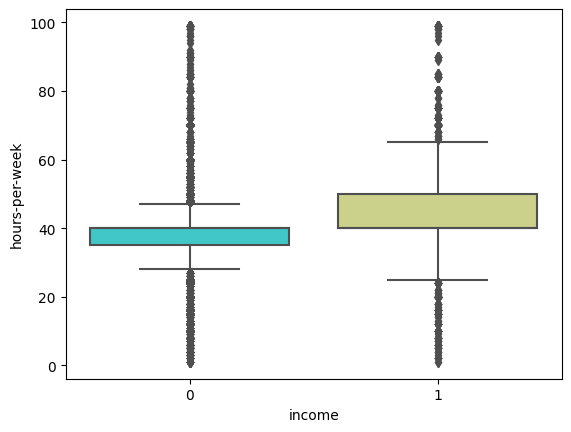

In [42]:
sns.boxplot(x="income", y="hours-per-week", data=df2,palette='rainbow');
# Crear un DataFrame con los datos de 'age' agrupados por 'income'
summary_df = df2.groupby('income')['hours-per-week'].describe()

# Mostrar el resumen
print(summary_df)

Income 0: <=50k , 1: >50k

la mayoría de los ingresos <=50K se encuentran en el rango de horas por semana entre 35 y 40, y se puede ver que los valores atipicos por encima del bigote aproximadamente de 48 horas por semana para arriba, y por debajo del bigote inferior aproximadamente de 28 horas por semana para abajo. Por otro lado encontramos que los ingresos >50K se encuentran en el rango de horas por semana entre 40 y 50, tambien podemos observar los valores atipicos por encima del bigote superior aproximadamente desde los 65 horas hacia arriba; y para los valores atipicos inferiores se pueden observar aproximadamente de 25 horas hacia abajo.

**5. Solucione los problemas referentes a calidad de datos presentes en al menos 6 variables, al menos dos de ellas deben ser categóricas. Elimine columnas irrelevantes. Identifique los datos atípicos reemplace esos valores por la media de cada clase o la moda, según corresponda. Debe agregar un párrafo, describiendo de manera ejecutiva, cuál fue el proceso seguido.**

Cambio de datos para la edad respecto a la clase

In [109]:
dfcorr=df2.copy()
dfcorr['education'] = dfcorr['education'].astype('int64')
dfcorr['marital-status'] = dfcorr['marital-status'].astype('int64')
dfcorr['workclass'] = dfcorr['workclass'].astype('int64')
dfcorr['occupation'] = dfcorr['occupation'].astype('int64')
dfcorr['relationship'] = dfcorr['relationship'].astype('int64')
dfcorr['sex'] = dfcorr['sex'].astype('int64')
dfcorr['race'] = dfcorr['race'].astype('int64')
dfcorr['native-country'] = dfcorr['native-country'].astype('int64')
dfcorr['income'] = dfcorr['income'].astype('int64')

In [110]:
# Importa plotly
import plotly.figure_factory as ff
# se comenta temporalmente
#df = df.drop('pasajeroId',axis=1)
# obtener los valores de la correlacion
correlation = dfcorr.corr().values.round(2)
# nombres de la columnas
names = list(dfcorr.corr().columns.values)
# se obtiene la transpuesta
transposed_corr = correlation[::-1]
ff.create_annotated_heatmap(transposed_corr, x = names,y = names[::-1], colorscale='plotly3')

Eliminación de columna irrelevante fnlwgt (preguntar por la raza debido a correlación)





In [111]:
df2 = df2.drop('fnlwgt', axis=1)

# Verifica que la columna 'fnlwgt' se haya eliminado
print(df2.head())

   age workclass education  education-num marital-status occupation  \
0   50         0        12             13              1          0   
1   38         5         8              9              4          1   
2   53         5         6              7              1          1   
3   28         5        12             13              1          2   
4   37         5        13             14              1          0   

  relationship race sex  capital-gain  capital-loss  hours-per-week  \
0            0    0   0             0             0              13   
1            1    0   0             0             0              40   
2            0    1   0             0             0              40   
3            2    1   1             0             0              40   
4            2    0   1             0             0              40   

  native-country income  
0              0      0  
1              0      0  
2              0      0  
3             11      0  
4              0

income
0    36.783648
1    44.249841
Name: age, dtype: float64
          count       mean        std   min   25%   50%   75%   max
income                                                             
0       24719.0  33.959068  10.198854  17.0  25.0  34.0  41.0  57.0
1        7841.0  43.422453   9.131094  24.0  37.0  44.0  50.0  64.0


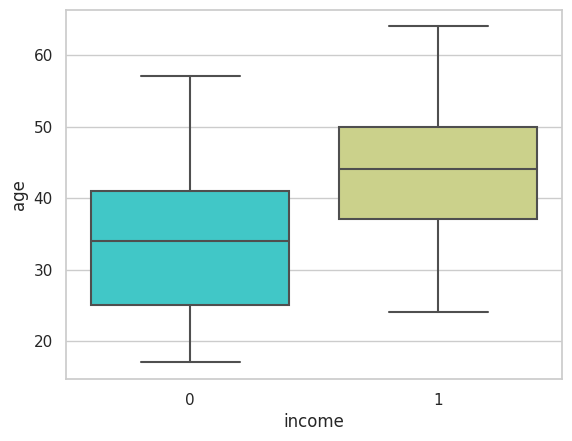

In [112]:
df3=df2.copy()
mean_by_income = df3.groupby('income')['age'].mean()

print(mean_by_income)
# Crea una función para reemplazar los valores atípicos
def replace_outliers(row):
    income = row['income']
    age = row['age']
    mean_age = mean_by_income[income]

    if age < mean_age - 1.5 * df3['age'].std() or age > mean_age + 1.5 * df3['age'].std():
        return mean_age
    else:
        return age

# Aplica la función para reemplazar los valores atípicos
df3['age'] = df3.apply(replace_outliers, axis=1)

# Vuelve a trazar el gráfico de caja actualizado si es necesario
sns.boxplot(x="income", y="age", data=df3, palette='rainbow')
summary_df = df3.groupby('income')['age'].describe()
# Mostrar el resumen
print(summary_df)

Cambio de datos para las horas por semana respecto a la clase

          count       mean       std   min        25%        50%   75%   max
income                                                                      
0       24719.0  39.391238  0.603600  38.0  38.840163  38.840163  40.0  41.0
1        7841.0  44.995696  6.806398  27.0  40.000000  45.000000  50.0  63.0


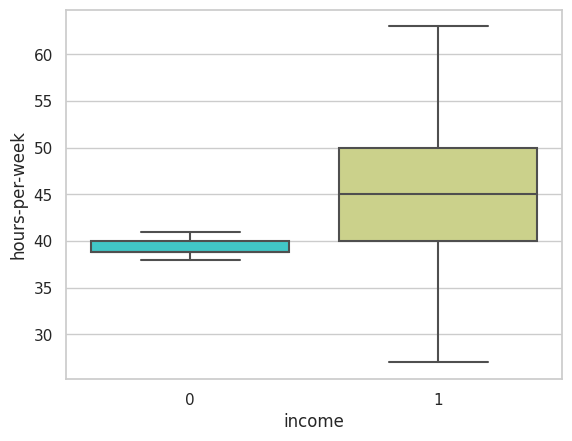

In [113]:
df4=df3.copy()


mean_by_income = df4.groupby('income')['hours-per-week'].mean()

# Crea una función para reemplazar los valores atípicos
def replace_outliers(row):
    income = row['income']
    hours_per_week = row['hours-per-week']
    mean_hours = mean_by_income[income]

    if income == 0:
        min = 0.1
        max = 0.2
    else:
        min = 1.5
        max = 1.5

    if hours_per_week < mean_hours - min * df4['hours-per-week'].std() or hours_per_week > mean_hours + max * df4['hours-per-week'].std():
        return mean_hours
    else:
        return hours_per_week

# Aplica la función para reemplazar los valores atípicos
df4['hours-per-week'] = df4.apply(replace_outliers, axis=1)

# Vuelve a trazar el gráfico de caja actualizado
sns.boxplot(x="income", y="hours-per-week", data=df4, palette='rainbow')

# Calcula el resumen estadístico
summary_df = df4.groupby('income')['hours-per-week'].describe()
print(summary_df)


Cambio de datos para education-num  respecto a la clase

          count       mean       std  min   25%   50%   75%   max
income                                                           
0       24719.0   9.594927  2.436100  1.0   9.0   9.0  10.0  16.0
1        7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


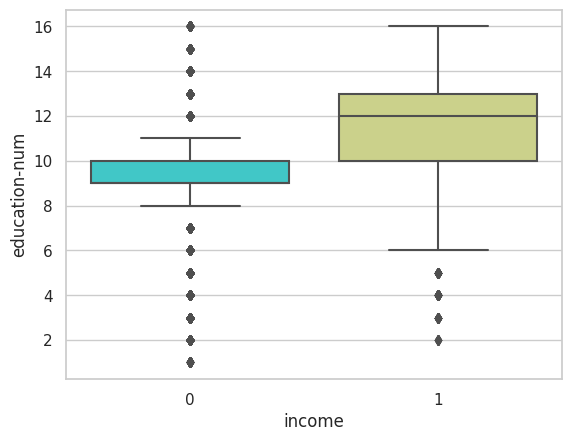

In [114]:
sns.boxplot(x="income", y="education-num", data=df4, palette='rainbow')
summary_df = df4.groupby('income')['education-num'].describe()
# Mostrar el resumen
print(summary_df)

income
0     9.594927
1    11.611657
Name: education-num, dtype: float64
          count       mean       std  min   25%        50%   75%   max
income                                                                
0       24719.0   9.511482  0.530397  8.0   9.0   9.594927  10.0  11.0
1        7841.0  11.606584  1.963973  8.0  10.0  11.611657  13.0  15.0


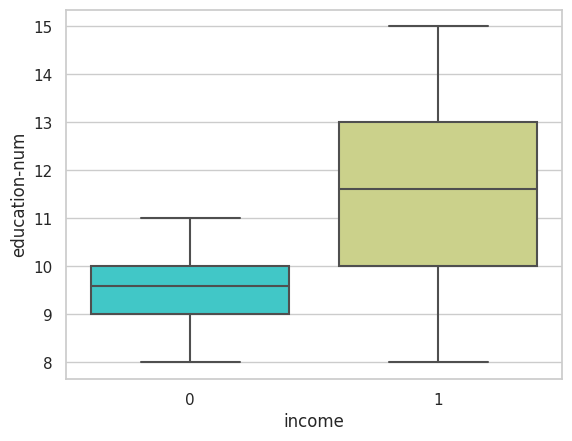

In [115]:
df5=df4.copy()
mean_by_income = df5.groupby('income')['education-num'].mean()

print(mean_by_income)
# Crea una función para reemplazar los valores atípicos
def replace_outliers(row):
    income = row['income']
    education = row['education-num']
    mean_education = mean_by_income[income]

    if income == 0:
        min = 1
        max = 0.8
    else:
        min = 1.5
        max = 1.5

    if education < mean_education - min * df5['education-num'].std() or education > mean_education + max * df5['education-num'].std():
        return mean_education
    else:
        return education

# Aplica la función para reemplazar los valores atípicos
df5['education-num'] = df5.apply(replace_outliers, axis=1)

# Vuelve a trazar el gráfico de caja actualizado si es necesario
sns.boxplot(x="income", y="education-num", data=df5, palette='rainbow')
summary_df = df5.groupby('income')['education-num'].describe()
# Mostrar el resumen
print(summary_df)

In [116]:
summary_df_education = df4.groupby('income')['education'].describe()
print(summary_df_education)

        count  unique  top  freq
income                          
0       24719      16    8  8826
1        7841      15   12  2221


In [117]:
df4['education'].unique()

[12, 8, 6, 13, 4, ..., 2, 5, 1, 0, 7]
Length: 16
Categories (16, int64): [5, 6, 7, 1, ..., 13, 0, 15, 9]

Text(0.5, 1.0, 'Histograma de Educación por Nivel de Ingreso')

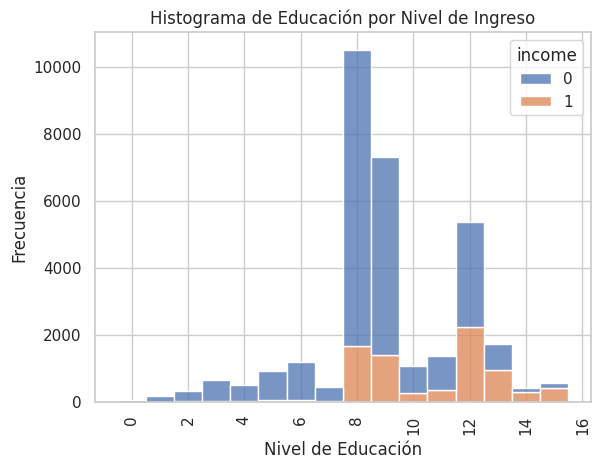

In [118]:
# Crear un histograma
sns.histplot(data=df4, x='education', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Educación por Nivel de Ingreso')

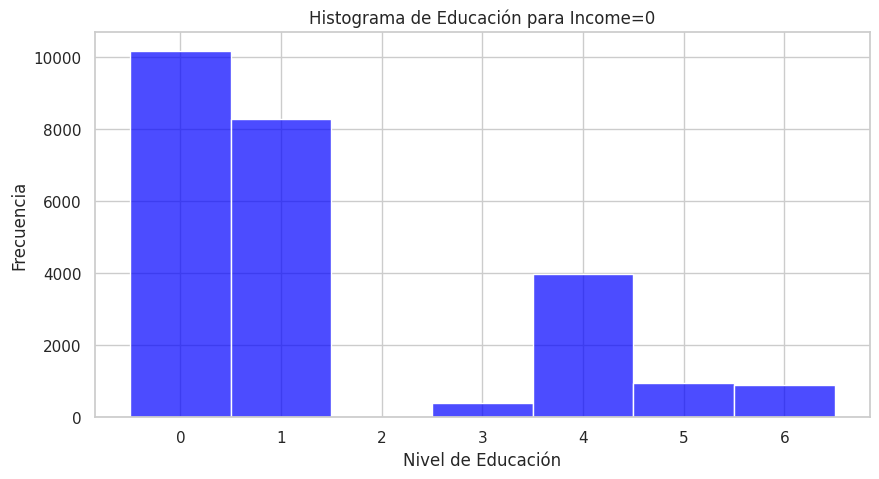

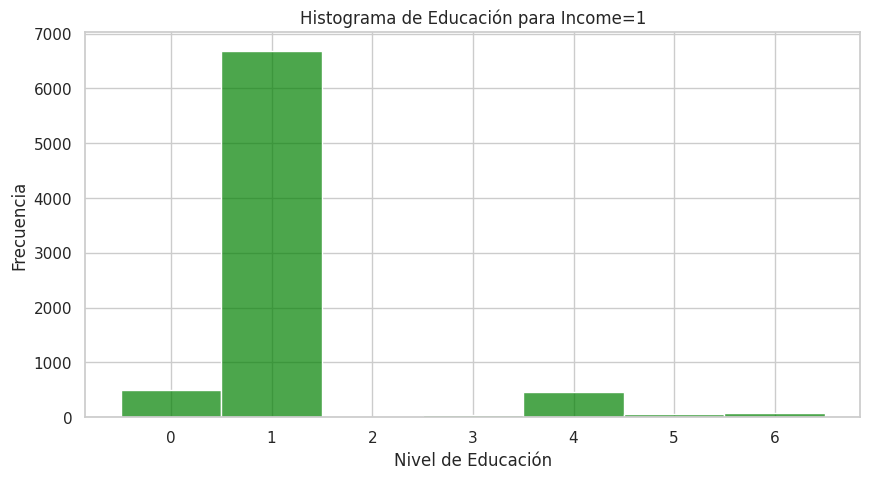

In [119]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un histograma para income=0
plt.figure(figsize=(10, 5))
sns.histplot(data=df4[df4['income'] == 0], x='marital-status', bins=15, color='blue', alpha=0.7)
plt.title('Histograma de Educación para Income=0')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')

# Mostrar el primer histograma
plt.show()

# Crear un histograma para income=1
plt.figure(figsize=(10, 5))
sns.histplot(data=df4[df4['income'] == 1], x='marital-status', bins=15, color='green', alpha=0.7)
plt.title('Histograma de Educación para Income=1')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')

# Mostrar el segundo histograma
plt.show()

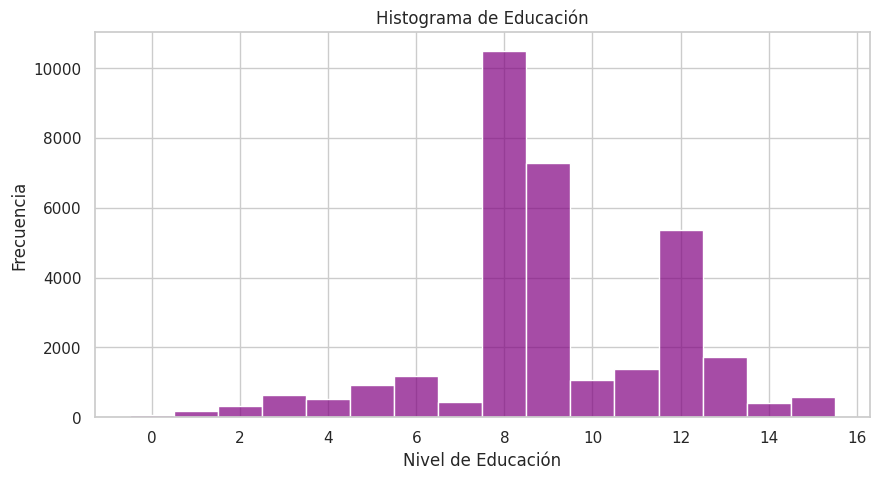

In [120]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un histograma sin respecto a nada
plt.figure(figsize=(10, 5))
sns.histplot(data=df4, x='education', bins=15, color='purple', alpha=0.7)
plt.title('Histograma de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Text(0.5, 1.0, 'Histograma de Educación por workclass')

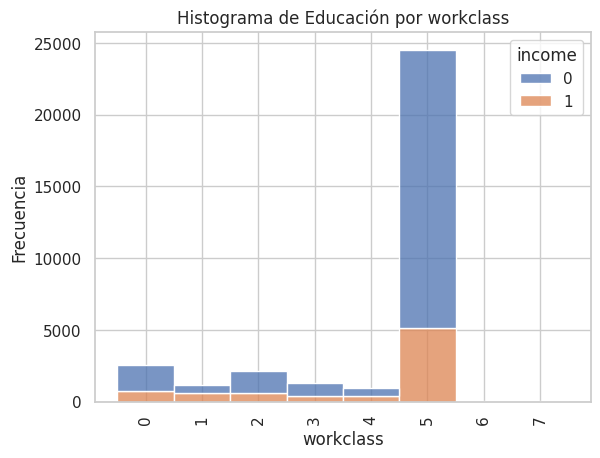

In [121]:
# Crear un histograma
sns.histplot(data=df4, x='workclass', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('workclass')
plt.ylabel('Frecuencia')
plt.title('Histograma de Educación por workclass')

In [122]:
df6=df5.copy()
df6['education'] = df6['education'].astype('int64')
df6['marital-status'] = df6['marital-status'].astype('int64')
df6['workclass'] = df6['workclass'].astype('int64')
df6['occupation'] = df6['occupation'].astype('int64')
df6['relationship'] = df6['relationship'].astype('int64')
df6['sex'] = df6['sex'].astype('int64')
df6['race'] = df6['race'].astype('int64')
df6['native-country'] = df6['native-country'].astype('int64')
df6['income'] = df6['income'].astype('int64')

In [123]:

correlation = df6.corr().values.round(2)
# nombres de la columnas
names = list(df6.corr().columns.values)
# se obtiene la transpuesta
transposed_corr = correlation[::-1]
ff.create_annotated_heatmap(transposed_corr, x = names,y = names[::-1], colorscale='plotly3')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**6. Construya 8 gráficos (explore diferentes gráficos, que no todos vayan a ser iguales).  Debe concluir sobre cada uno. Nota: los gráficos deben permitir evidenciar algo, si no se puede concluir nada al respecto no son de utilidad (esto llevará tiempo). Sugerencia hacer uso de Excel para una exploración previa y usar correlación de Pearson.**

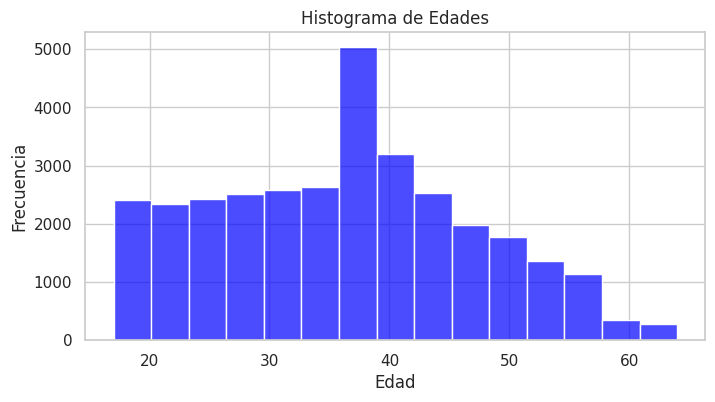

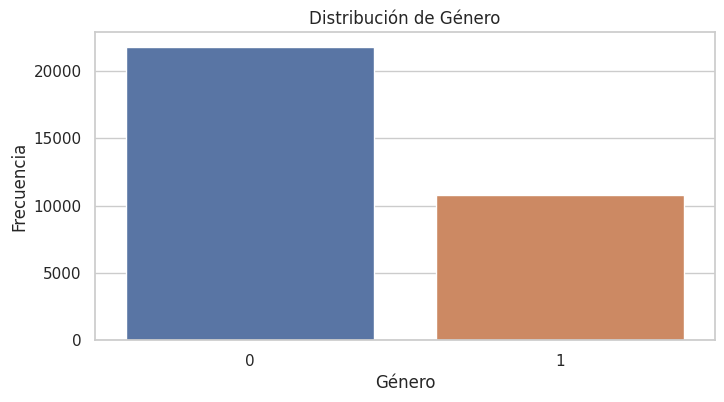

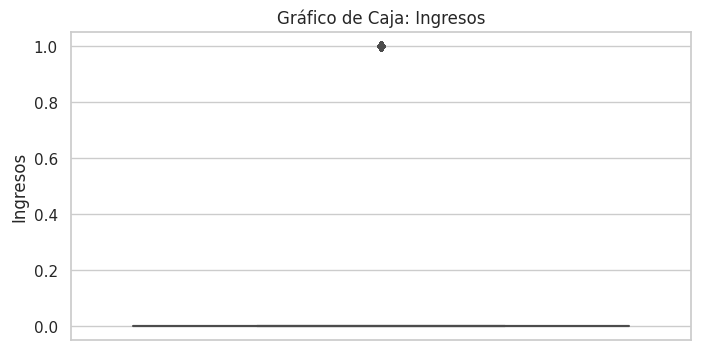

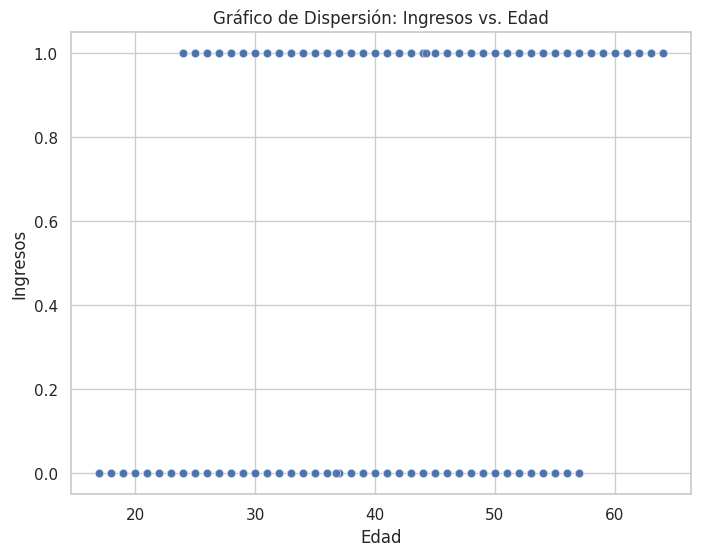

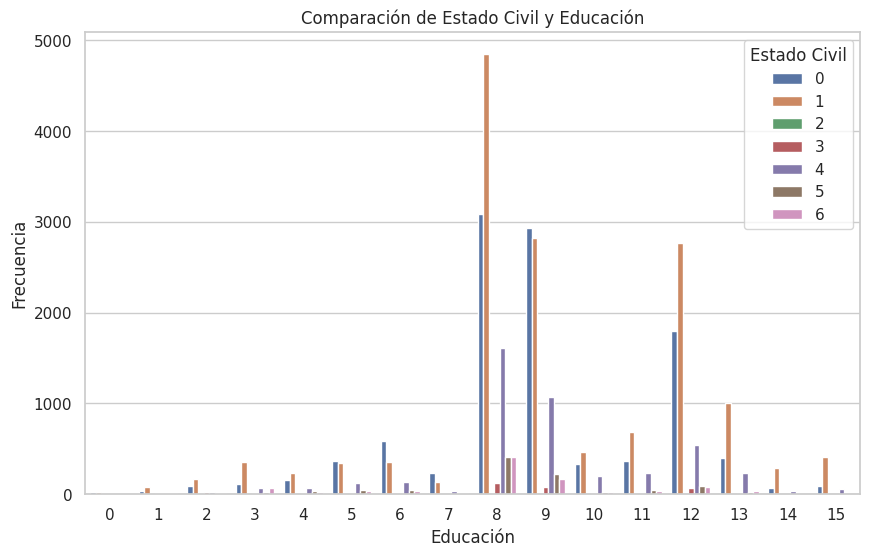

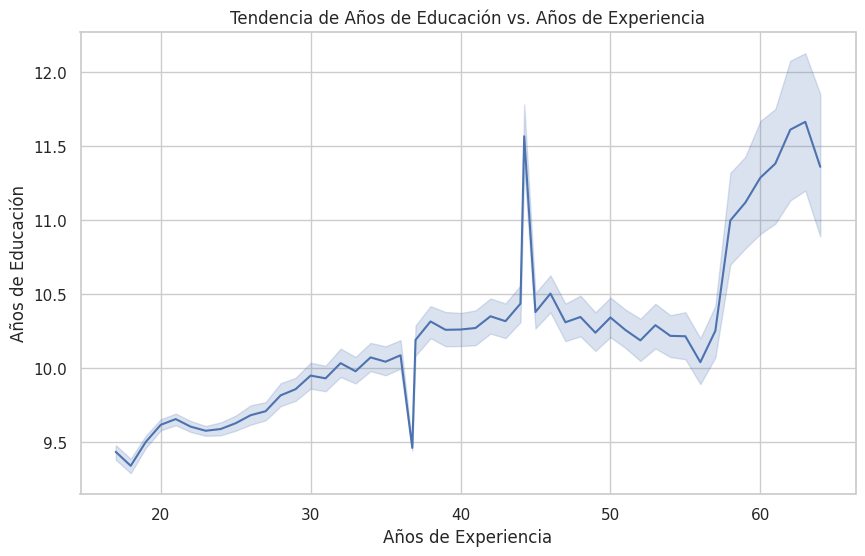

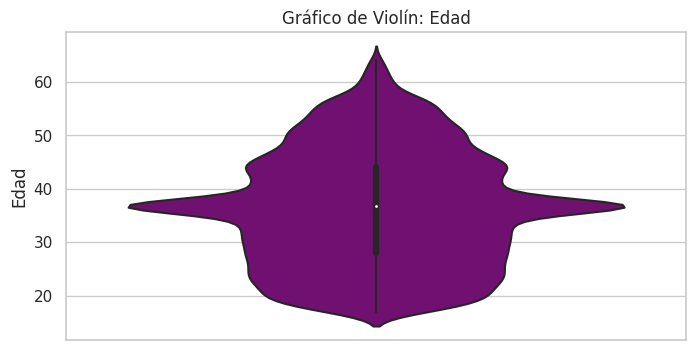

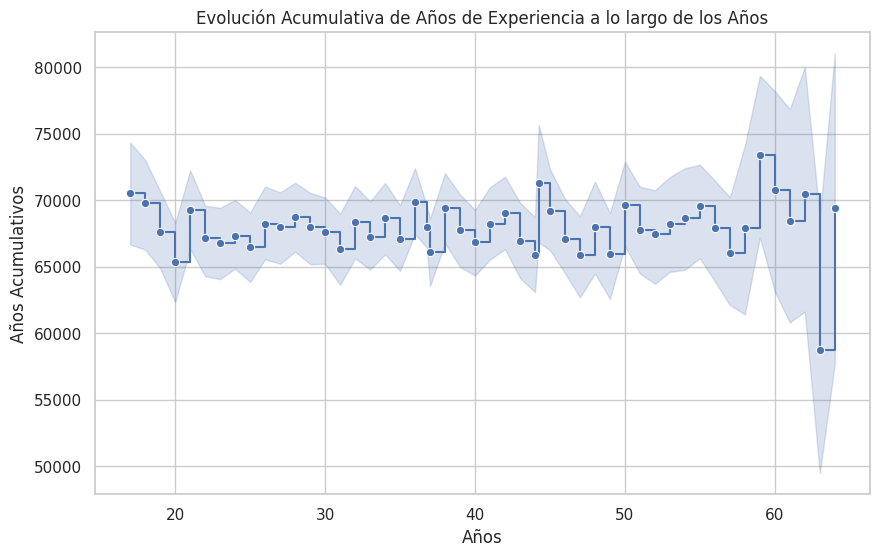

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Ejemplo 1: Histograma de una columna numérica
plt.figure(figsize=(8, 4))
sns.histplot(data=df6, x='age', bins=15, color='blue', alpha=0.7)
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Ejemplo 2: Gráfico de barras de una columna categórica
plt.figure(figsize=(8, 4))
sns.countplot(data=df6, x='sex')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Ejemplo 3: Boxplot de una columna numérica
plt.figure(figsize=(8, 4))
sns.boxplot(data=df6, y='income')
plt.title('Gráfico de Caja: Ingresos')
plt.ylabel('Ingresos')
plt.show()

# Ejemplo 4: Gráfico de dispersión entre dos columnas numéricas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df6, x='age', y='income', alpha=0.5)
plt.title('Gráfico de Dispersión: Ingresos vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

# Ejemplo 5: Gráfico de barras agrupadas de dos columnas categóricas
plt.figure(figsize=(10, 6))
sns.countplot(data=df6, x='education', hue='marital-status')
plt.title('Comparación de Estado Civil y Educación')
plt.xlabel('Educación')
plt.ylabel('Frecuencia')
plt.legend(title='Estado Civil')
plt.show()

# Ejemplo 6: Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df6, x='age', y='education-num')
plt.title('Tendencia de Años de Educación vs. Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Años de Educación')
plt.show()

# Ejemplo 7: Gráfico de violin de una columna numérica
plt.figure(figsize=(8, 4))
sns.violinplot(data=df6, y='age', color='purple')
plt.title('Gráfico de Violín: Edad')
plt.ylabel('Edad')
plt.show()

# Ejemplo 8: Gráfico de área acumulativa
df6['workclass'] = df6['workclass'].cumsum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df6, x='age', y='workclass', drawstyle='steps-post', marker='o')
plt.title('Evolución Acumulativa de Años de Experiencia a lo largo de los Años')
plt.xlabel('Años')
plt.ylabel('Años Acumulativos')
plt.show()
